In [1]:
import numpy as np

In [2]:
import modules.experiment.events as expevents
import modules.signal_reconstruction as sigrec

import modules.plots._shared as plots_shared
import modules.plots.signal_reconstruction as sigrec_plots
import modules.plots.experimental_data as exp_plots

from modules_reloader import reloader

relmod = reloader(expevents, sigrec, sigrec_plots, exp_plots, plots_shared)

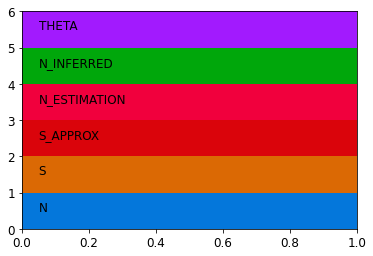

In [3]:
relmod()
plots_shared.Color.plot_palette()

In [5]:
processor = expevents.EventProcessor(N=45, verbosity=3, load_rir=False)
# L = processor.feu84_rireff.L
L = 10
N = processor.N

In [6]:
event_id = 10675
ev = expevents.Event(event_id)

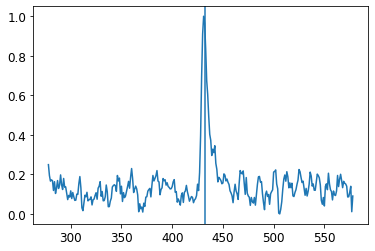

In [7]:
window = 300
frame_sum = None
for i_ch in range(109):
    try:
        t, signal, _ = ev.signal_in_channel(i_ch=i_ch, center_bin=ev.TRIGGER_BIN, window=window)
        frame_sum = signal if frame_sum is None else frame_sum + signal
    except ValueError:
        continue
frame_sum -= np.min(frame_sum)
frame_sum /= np.max(frame_sum)
# return np.sum(frame_sum * t) / np.sum(frame_sum)

import matplotlib.pyplot as plt

plt.plot(t, frame_sum)
est = np.sum(frame_sum * t) / np.sum(frame_sum)
plt.axvline(est)

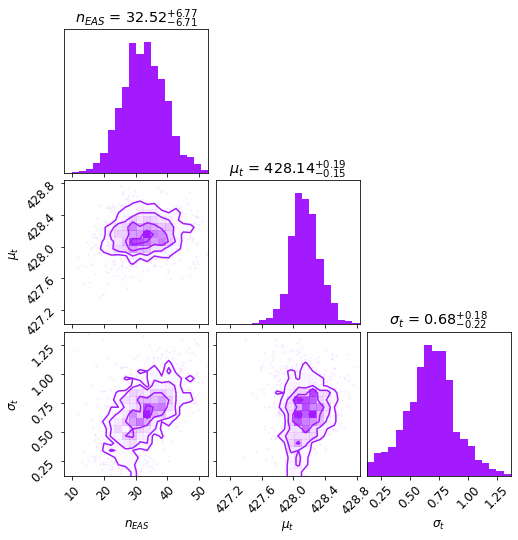

In [8]:
i_ch = 1
theta_sample = processor.read_signal_reconstruction(ev.id_, i_ch)
sigrec_plots.plot_theta_sample(theta_sample, n_sigmas_cut=1, cut_along=[False, True, True])

In [13]:
processor.min_signal_significance

4.0

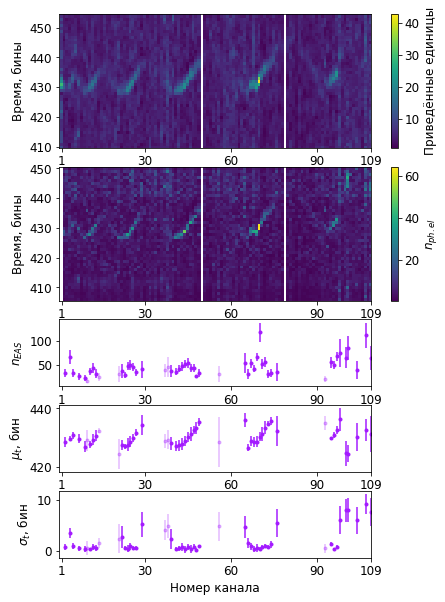

In [12]:
relmod()
f, a = sigrec_plots.plot_signal_reconstruction(ev, processor, filename='deconvolution-and-reconstruction')